In [1]:
import sys
import json
import pandas as pd
import torch as tc
import torch.nn as nn
import torch.optim as optim
from types import SimpleNamespace
from sklearn.datasets import fetch_california_housing

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from build_dataset import get_dataloaders
from experiment import model_pipeline
from utils import set_seed, load_config, load_json
from plots import *

In [3]:
config = load_config(path=f"../config.yaml")
cfg = SimpleNamespace(**config)
print(json.dumps(vars(cfg), indent=2))

set_seed(cfg.seed)
device = "cuda" if tc.cuda.is_available() else "cpu"

{
  "dataset": "housing",
  "fig_path": "../outputs/",
  "seed": 42,
  "dpi": 400,
  "normalize": "StandardScaler",
  "data_split": 0.2,
  "batch_size": 128
}


In [4]:
folder = "../experiments/"
fpath = folder + "base_model"
params = load_json(path=fpath + "/params.json")
prms = SimpleNamespace(**params)
print(json.dumps(vars(prms), indent=2))

{
  "epochs": 15,
  "learning_rate": 0.0001,
  "hidden_dim": 64,
  "dropout": 0.0
}


## Data visualization

In [5]:
df_housing = fetch_california_housing(as_frame=True).frame

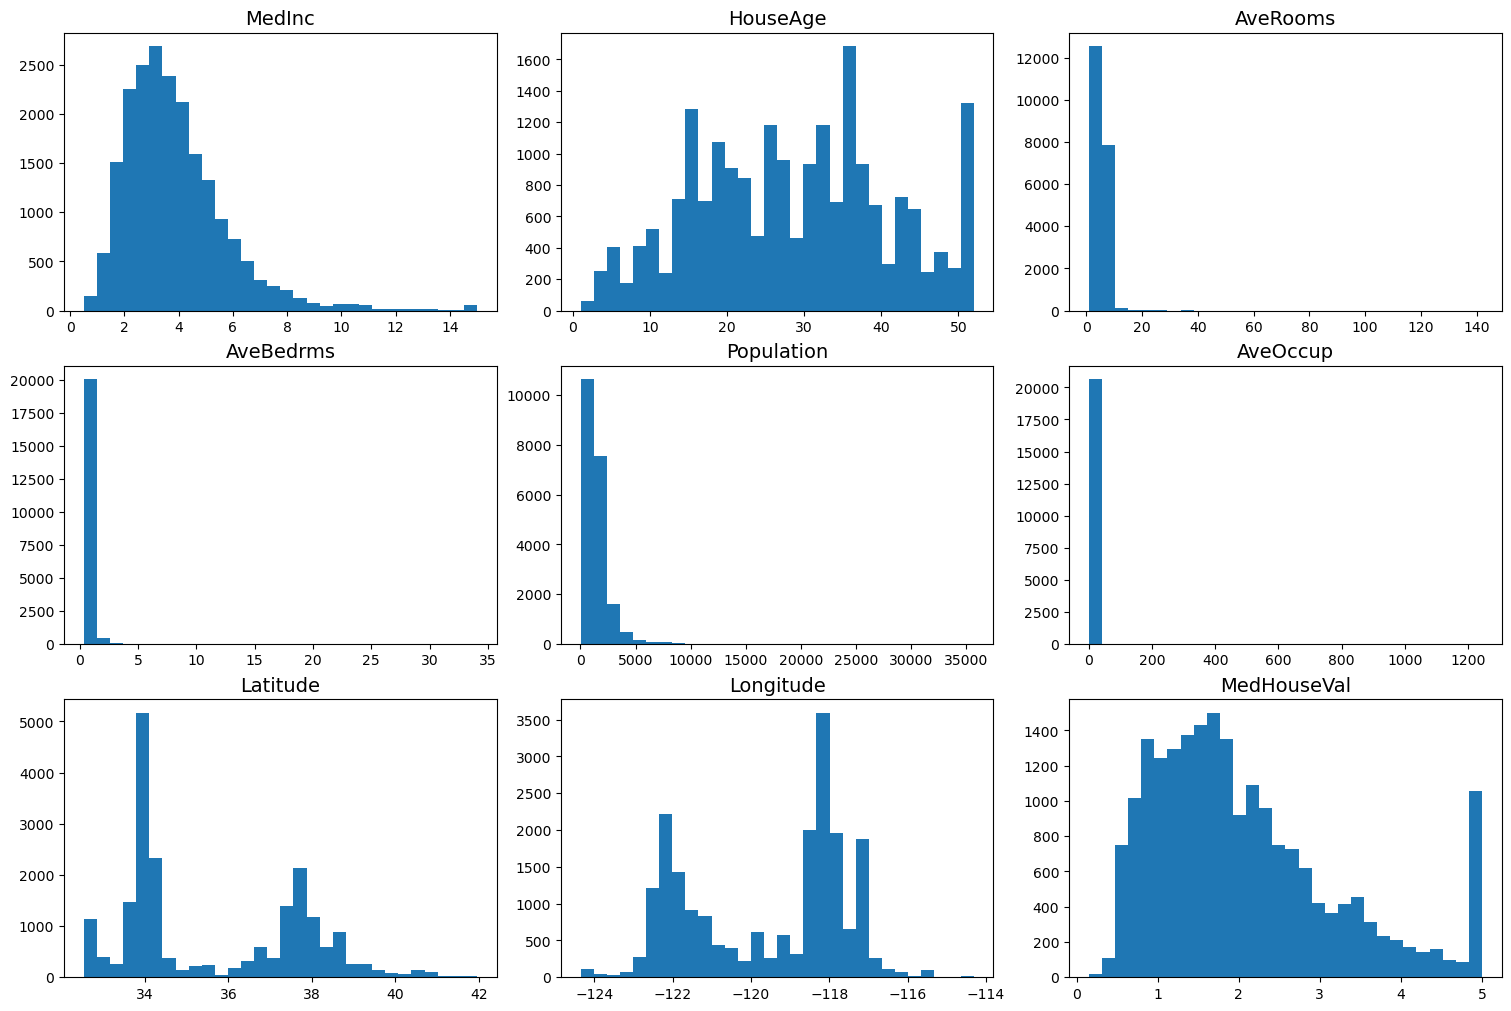

In [6]:
plot_feature_distributions(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

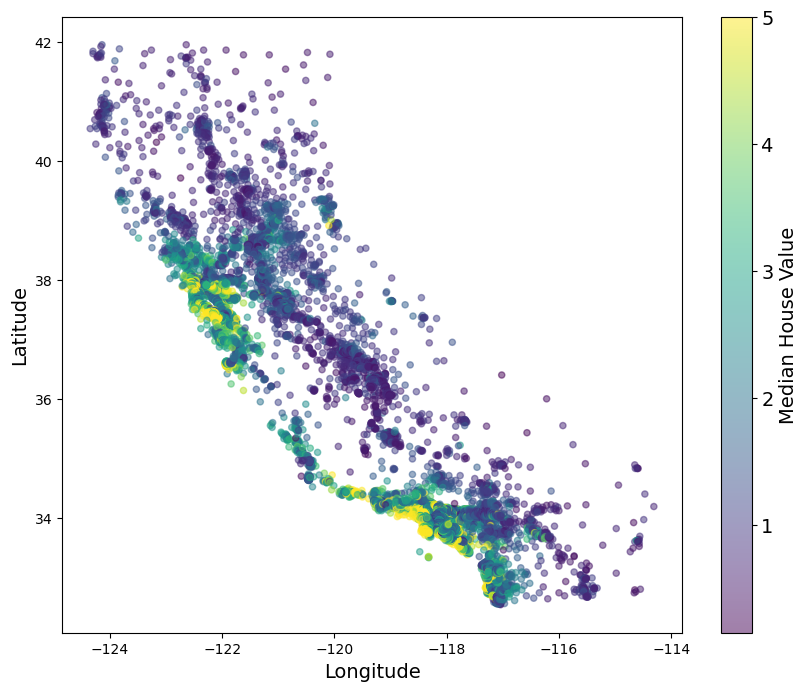

In [7]:
plot_price_by_location(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

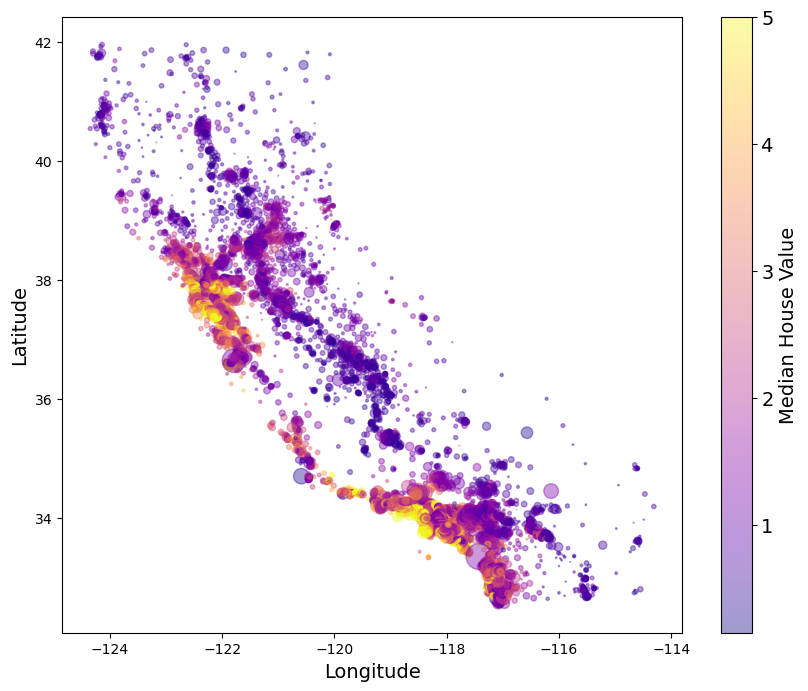

In [8]:
plot_population_and_prices(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

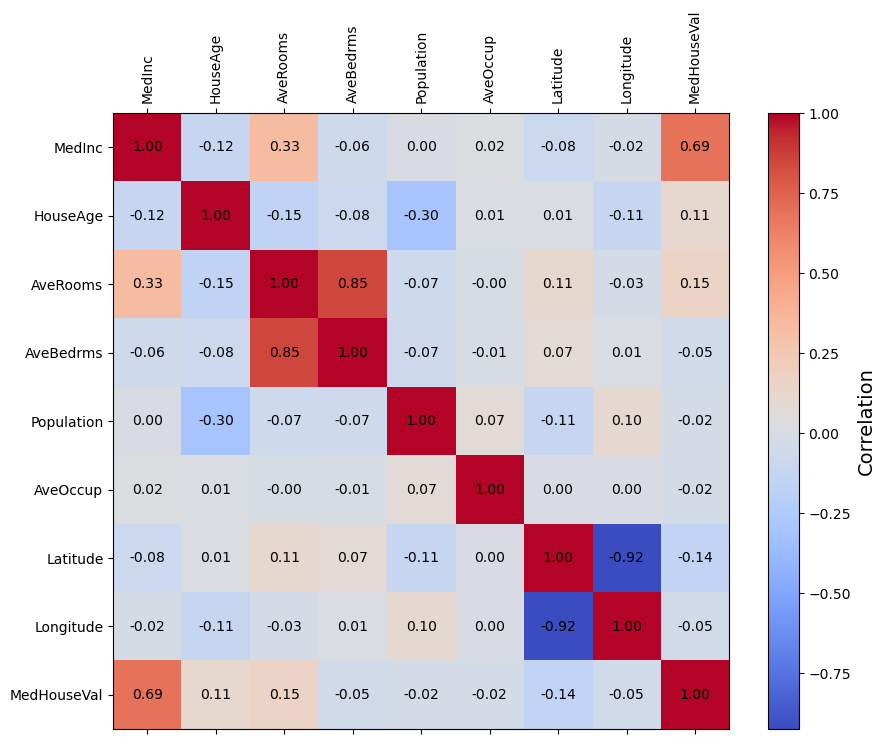

In [9]:
plot_correlation_map(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

## Training

Epoch 1:
Train - Huber: 1.3133, R2-score: -2.3761
Validation - Huber: 1.1421, R2-score: -1.9004

Epoch 2:
Train - Huber: 0.9866, R2-score: -1.4390
Validation - Huber: 0.8177, R2-score: -0.9753

Epoch 3:
Train - Huber: 0.6886, R2-score: -0.6180
Validation - Huber: 0.5728, R2-score: -0.3153

Epoch 4:
Train - Huber: 0.4841, R2-score: -0.1055
Validation - Huber: 0.4109, R2-score: 0.0905

Epoch 5:
Train - Huber: 0.3603, R2-score: 0.1922
Validation - Huber: 0.3173, R2-score: 0.3294

Epoch 6:
Train - Huber: 0.2998, R2-score: 0.3580
Validation - Huber: 0.2738, R2-score: 0.4448

Epoch 7:
Train - Huber: 0.2713, R2-score: 0.4419
Validation - Huber: 0.2489, R2-score: 0.5129

Epoch 8:
Train - Huber: 0.2520, R2-score: 0.5007
Validation - Huber: 0.2312, R2-score: 0.5620

Epoch 9:
Train - Huber: 0.2363, R2-score: 0.5486
Validation - Huber: 0.2171, R2-score: 0.5976

Epoch 10:
Train - Huber: 0.2233, R2-score: 0.5836
Validation - Huber: 0.2081, R2-score: 0.6187

Epoch 11:
Train - Huber: 0.2138, R2-score:

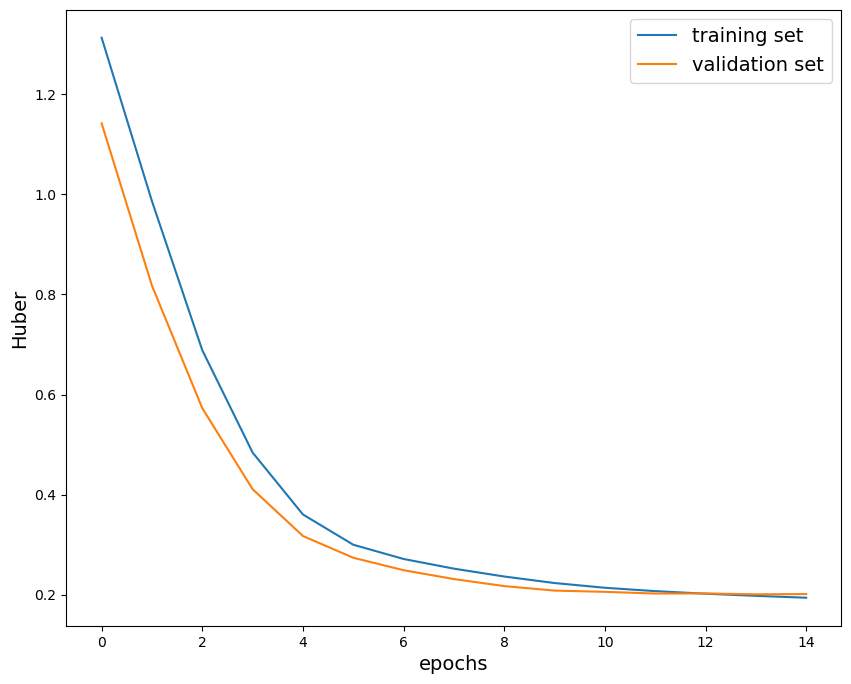

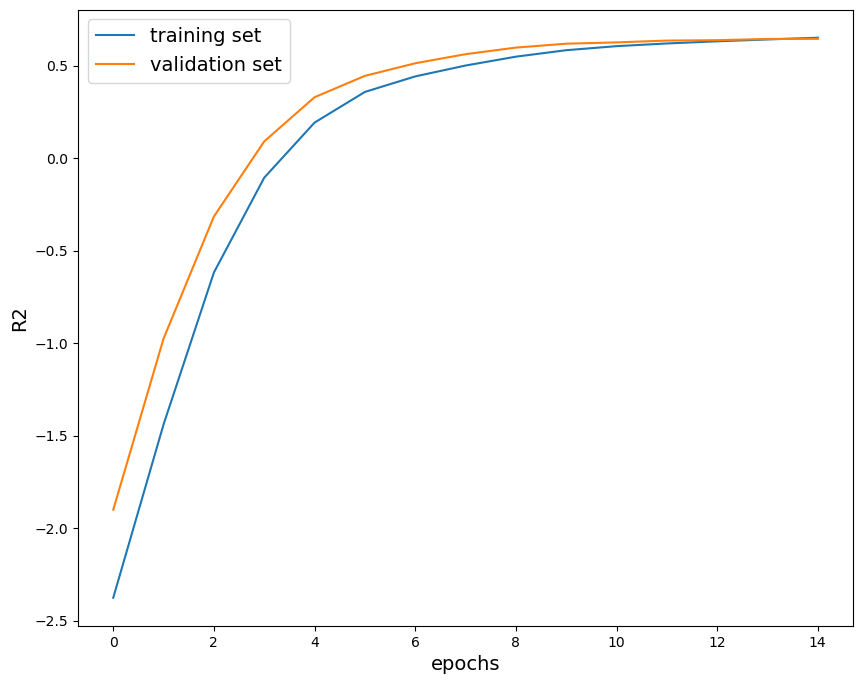

In [10]:
train, val, test = get_dataloaders(cfg.dataset, cfg.normalize, cfg.data_split, cfg.batch_size, cfg.seed)
test_metrics = model_pipeline(train, val, test, prms, cfg, fpath, device, plot=True)

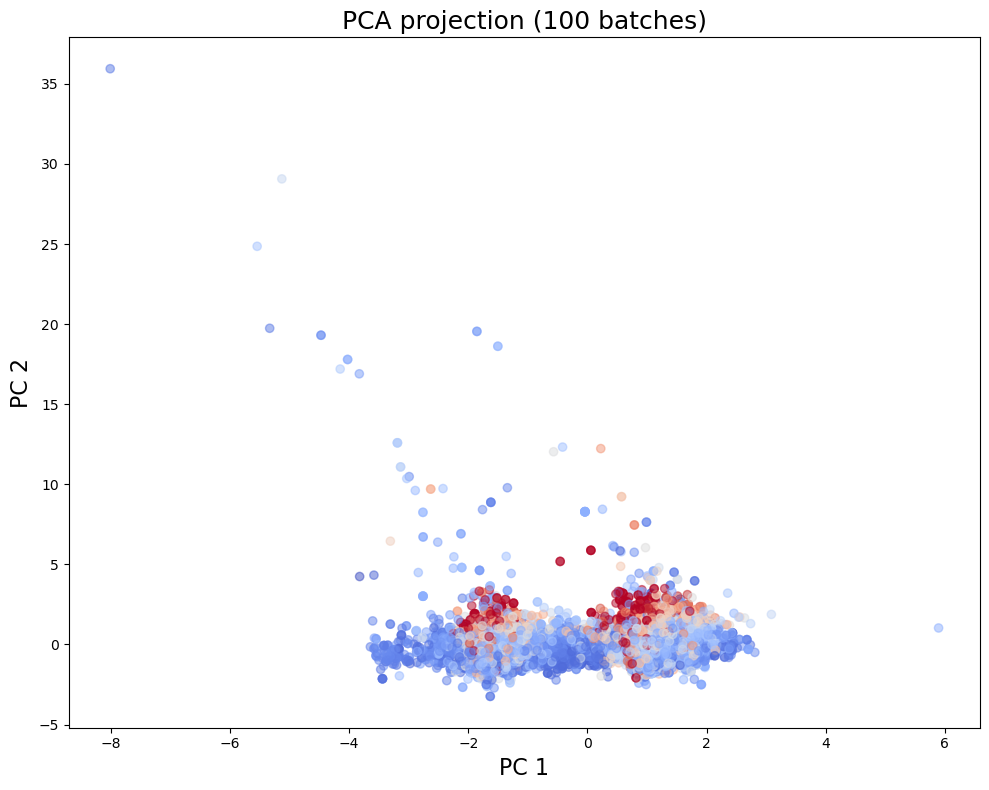

In [11]:
plot_pca(train, cfg.fig_path, cfg.dpi, cfg.dataset, n_components=2)

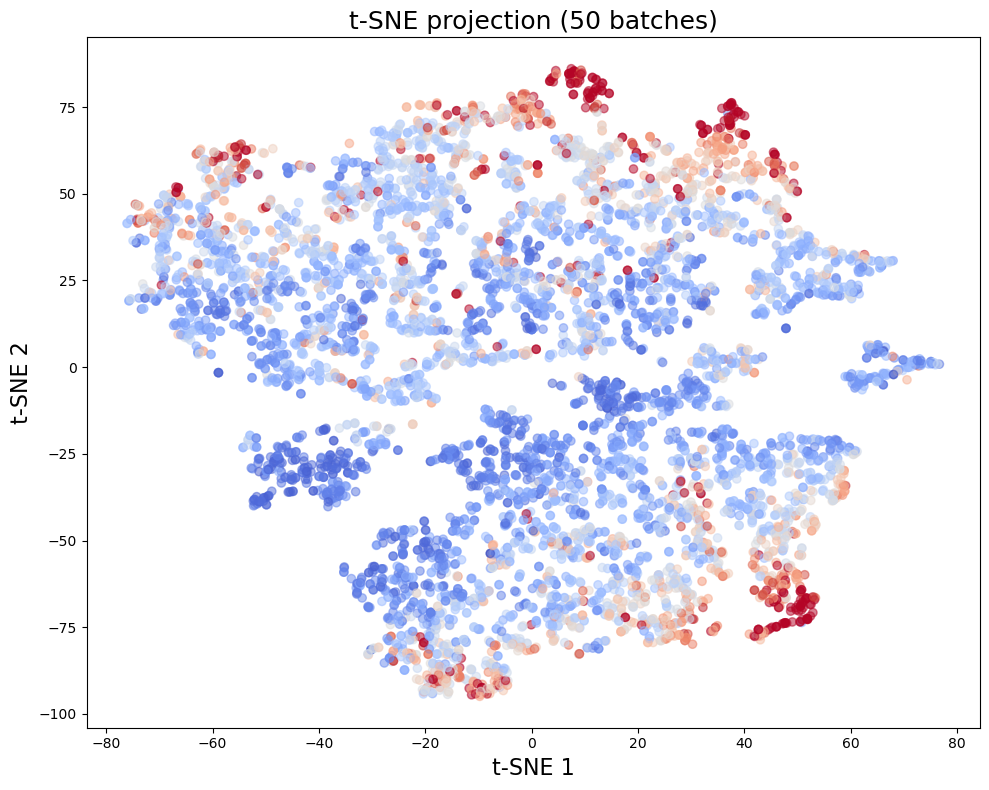

In [12]:
plot_t_sne(train, cfg.fig_path, cfg.dpi, cfg.dataset, n_components=2, iter_size=50)